# Exploring Tezos and Bitcoin Data

This notebook focuses on the exploratory analysis of data collected on Tezos and Bitcoin. It is purely dedicated to understanding the data through visualization and basic exploration, without the use of machine learning or advanced modeling techniques.

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_theme(style="dark")


In [2]:
dfBTC = pd.read_csv('bitcoin_data.csv')
dfBTC.describe()

,price,market_cap,volume
count,4375.000000,4.374000e+03,4.375000e+03
mean,19186.961837,3.668193e+11,1.696539e+10
std,24392.389174,4.789030e+11,2.114934e+10
min,67.809000,7.713681e+08,0.000000e+00
25%,624.620000,9.149146e+09,3.939081e+08
50%,8173.632762,1.437812e+11,8.463267e+09
75%,29860.196291,5.739996e+11,2.758522e+10
max,106182.236820,2.100630e+12,3.051904e+11


In [3]:
dfXTZ = pd.read_csv('tezos_data.csv')
dfXTZ.describe()
print(dfBTC['volume'].max())


305190442156.92804


Convert date to datetime

In [4]:
dfXTZ['date'] = pd.to_datetime(dfXTZ['date'])
dfBTC['date'] = pd.to_datetime(dfBTC['date'])

## Plotting Tezos and Bitcoin Data on a simple line chart

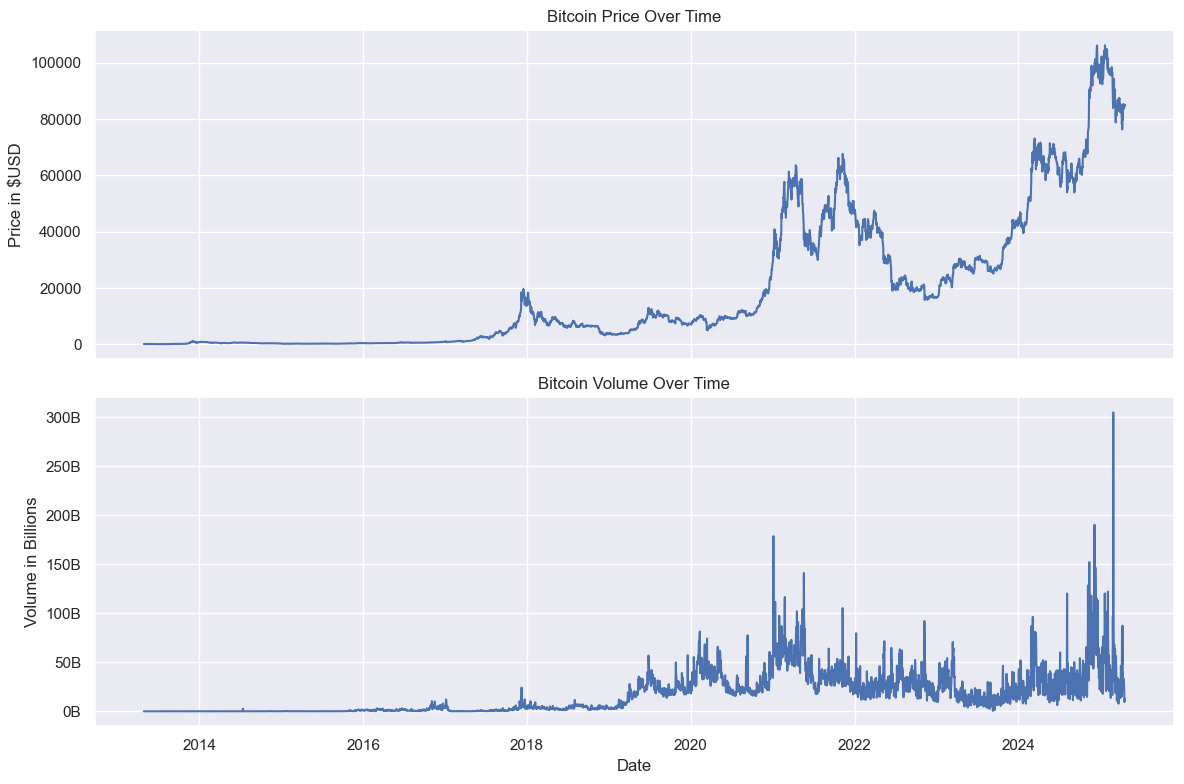

In [5]:
import matplotlib.ticker as mtick

fig, axes = plt.subplots(2, 1, figsize=(12, 8), sharex=True)

# Price plot
sns.lineplot(data=dfBTC, x='date', y='price', ax=axes[0])
axes[0].set_title('Bitcoin Price Over Time')
axes[0].set_ylabel('Price in $USD')
axes[0].grid(True)

# Volume plot
sns.lineplot(data=dfBTC, x='date', y='volume', ax=axes[1])
axes[1].set_title('Bitcoin Volume Over Time')
axes[1].set_ylabel('Volume in Billions')
axes[1].set_xlabel('Date')
axes[1].grid(True)

# Format volume axis in bllions
axes[1].yaxis.set_major_formatter(mtick.FuncFormatter(lambda x, _: f'{x * 1e-9:.0f}B'))

plt.tight_layout()
plt.show()



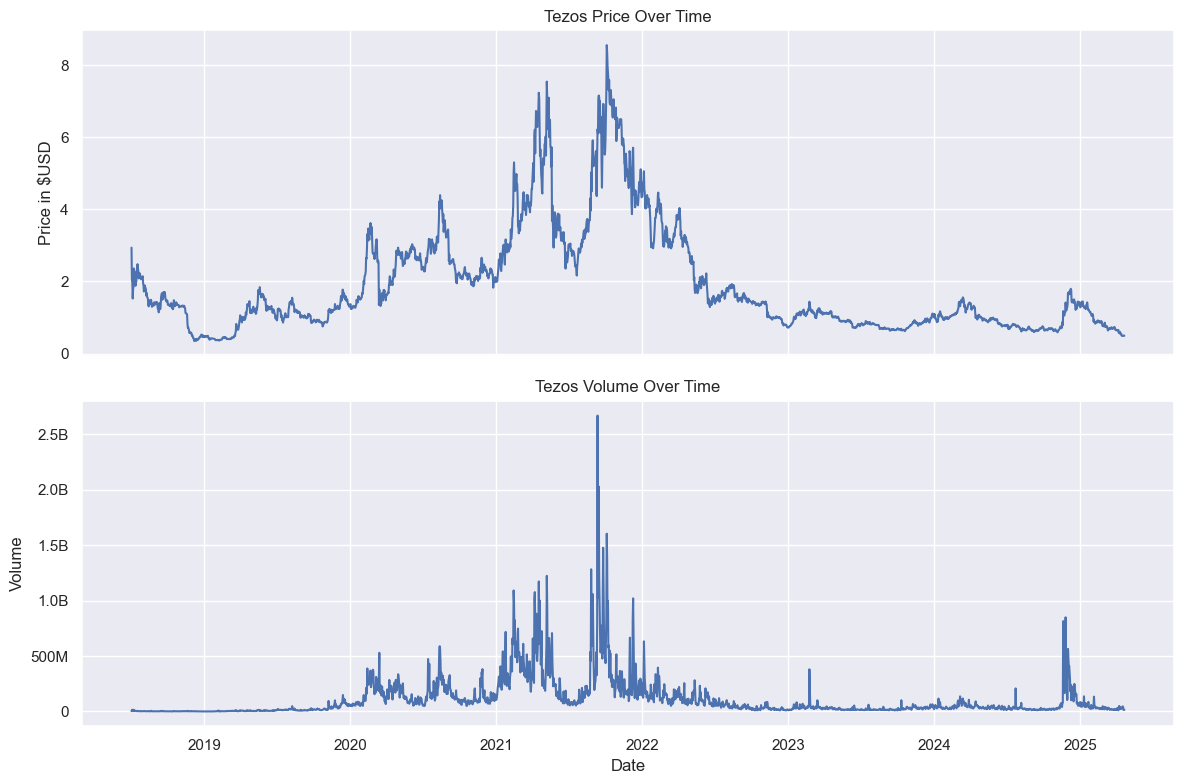

In [6]:
fig, axes = plt.subplots(2, 1, figsize=(12, 8), sharex=True)

# Price plot
sns.lineplot(data=dfXTZ, x='date', y='price', ax=axes[0])
axes[0].set_title('Tezos Price Over Time')
axes[0].set_ylabel('Price in $USD')
axes[0].grid(True)

# Volume plot
sns.lineplot(data=dfXTZ, x='date', y='volume', ax=axes[1])
axes[1].set_title('Tezos Volume Over Time')
axes[1].set_ylabel('Volume')
axes[1].set_xlabel('Date')
axes[1].grid(True)

# Custom formatter
def volume_formatter(x, _):
    if x >= 1e9:
        return f'{x/1e9:.1f}B'
    elif x >= 1e6:
        return f'{int(x/1e6)}M'
    elif x >= 1e3:
        return f'{int(x/1e3)}K'
    else:
        return f'{int(x)}'

axes[1].yaxis.set_major_formatter(mtick.FuncFormatter(volume_formatter))

plt.tight_layout()
plt.show()


## Visualizing prices as a % of the All-Time High (ATH)


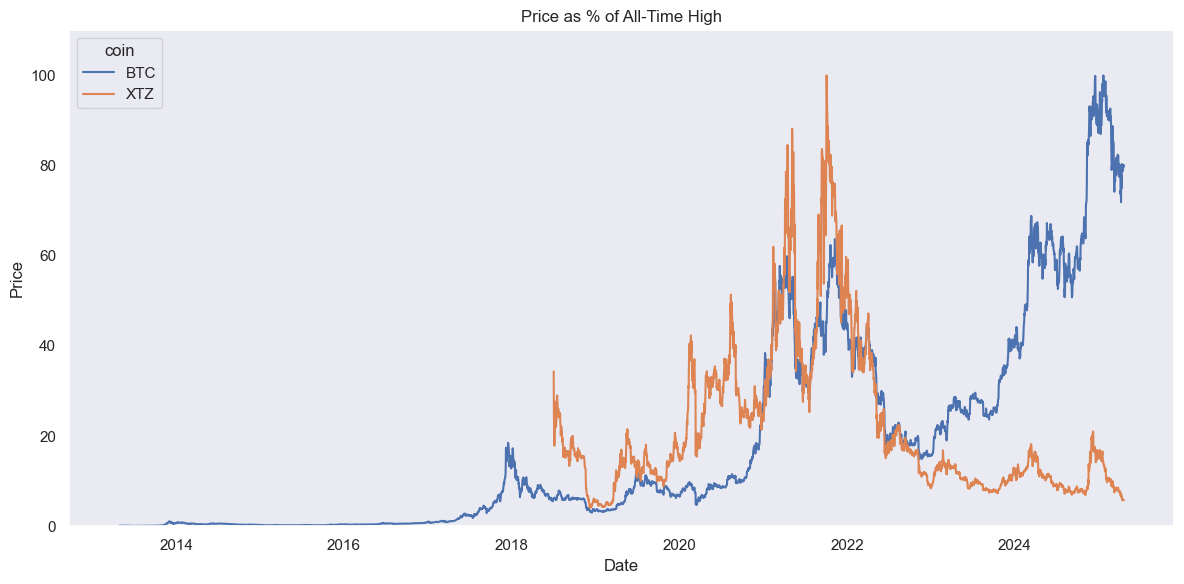

In [7]:
dfBTC['price_pct_ath'] = dfBTC['price'] / dfBTC['price'].max() * 100
dfXTZ['price_pct_ath'] = dfXTZ['price'] / dfXTZ['price'].max() * 100
dfBTC['coin'] = 'BTC'
dfXTZ['coin'] = 'XTZ'

dfMerged = pd.concat([dfBTC,dfXTZ])

plt.figure(figsize=(12, 6))
sns.lineplot(data=dfMerged, x='date', y='price_pct_ath', hue='coin')
plt.title('Price as % of All-Time High')
plt.xlabel('Date')
plt.ylabel('Price')
plt.ylim(0, 110)
plt.tight_layout()
plt.show()

## Price correlation between Tezos and Bitcoin

### Fixing the data mismatch
Because Bitcoin has been tracked for a longer period of time than Tezos, we need to ensure that the data is aligned correctly. We will do this by filtering the data to only include dates where both datasets have values.

In [8]:
# Get the common dates between both DataFrames
common_dates = dfBTC['date'].isin(dfXTZ['date'])
print("Number of common dates:", common_dates.sum())
# Filter each DataFrame to include only rows where the dates match
dfBTCfiltered = dfBTC[common_dates]
dfXTZfiltered = dfXTZ

print(dfBTCfiltered.shape, dfXTZfiltered.shape)
common_dates

Number of common dates: 2485
(2485, 6) (2485, 6)


0       False
1       False
2       False
3       False
4       False
        ...  
4370     True
4371     True
4372     True
4373     True
4374     True
Name: date, Length: 4375, dtype: bool

-0.3923556645977417


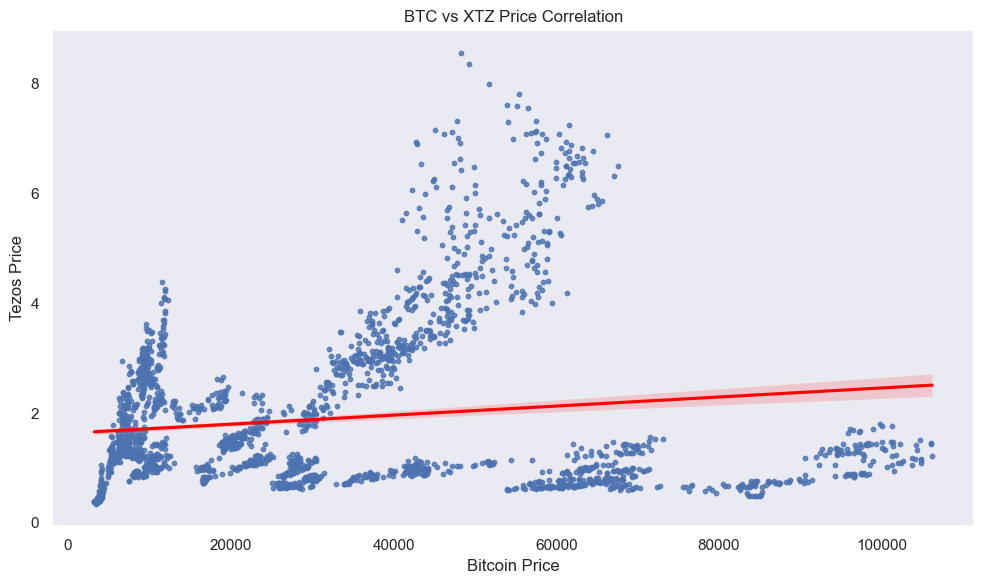

In [12]:
correlation = dfBTCfiltered['price'].corr(dfXTZfiltered['price'])
print(correlation) #output: -0.3923556645977417

plt.figure(figsize=(10, 6))
sns.regplot(x=dfBTCfiltered['price'], y=dfXTZfiltered['price'], scatter_kws={'s': 10}, line_kws={'color': 'red'})

plt.title('BTC vs XTZ Price Correlation')
plt.xlabel('Bitcoin Price')
plt.ylabel('Tezos Price')
plt.tight_layout()
plt.show()

